### Health Care Data Analysis Project

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
# Load Data
data = pd.read_csv("./Health_dataset.csv")

# Checking Imported Data
data.head()

,Patient ID,Gender,Disease,Treatment,Hospital,Admission Date,Discharge Date,Treatment Status,Cause of Death,Date of Birth
0,PAT-00001,Male,Tuberculosis,Dialysis,City General Hospital,2022-12-19,2023-01-16,Recovered,NaN,1973-06-05
1,PAT-00002,Female,Malaria,Dialysis,City General Hospital,2023-03-29,2023-04-21,Recovered,NaN,1998-11-21
2,PAT-00003,Female,Malaria,Surgery,City General Hospital,2022-09-16,2022-10-15,Recovered,NaN,1942-02-14
3,PAT-00004,Male,Asthma,Dialysis,City General Hospital,2022-02-07,2022-02-11,Recovered,NaN,1943-01-17
4,PAT-00005,Female,Diabetes,Physical Therapy,City General Hospital,2022-10-25,2022-10-30,Recovered,NaN,1979-07-28


1. Count the total number of patients.

In [20]:
tot_patients = data.shape[0]
print(f"Total Patients => {tot_patients}.")

Total Patients => 8000.


2. How is the patient population distributed by gender.

In [34]:
gender_distribution = data["Gender"].value_counts()

print(f"Gender Distribution\n{gender_distribution}.")

Gender Distribution
Gender
Male      5206
Female    2794
Name: count, dtype: int64.


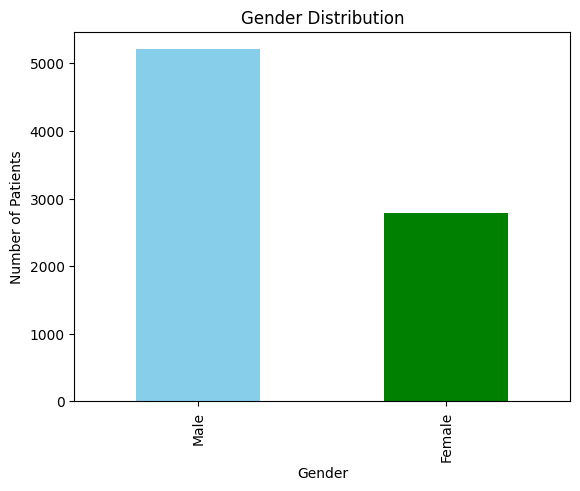

In [35]:
gender_distribution.plot(kind="bar", color=['skyblue', 'green'])

# Adding Title
plt.title("Gender Distribution")

# Adding Label on Y-axis
plt.ylabel("Number of Patients")

# For Visualization of graph
plt.show()


3. Patient's Age group by visit.

Age Group
21-40     1646
41-60     1608
81-100    1603
61-80     1580
0-20      1533
Name: count, dtype: int64


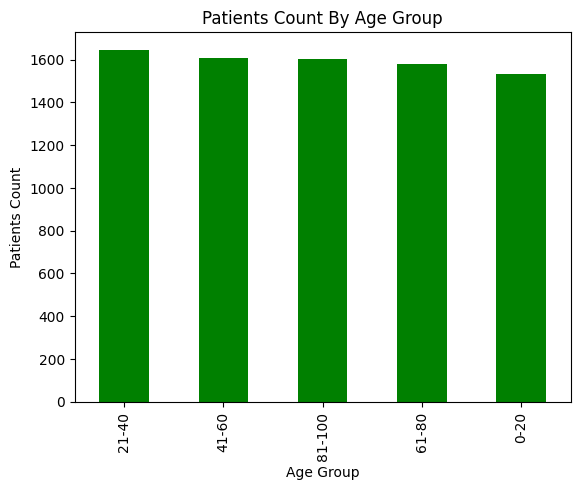

In [44]:
# 1. Convert Admission Date and DOB to proper format.
data['Admission Date'] = pd.to_datetime(data['Admission Date'])
data['Date of Birth'] = pd.to_datetime(data['Date of Birth'])

# 2. Calculate patient's age by Admission Age
data['Age'] = (data['Admission Date'] - data['Date of Birth']).dt.days / 365.25
data['Age'] = data['Age'].astype(int)

# 3. Define Age Bins
age_bins = [0,20,40,60,80,100]
age_labels = ['0-20', '21-40', '41-60', '61-80', '81-100']

# 4. Creating new col "Age Group", to put individual age value into respective group.
data['Age Group'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels, right=False)

# 5. Count Number of Patients in each Age Group
patients_count = data['Age Group'].value_counts()

# 6. Result
print(patients_count)

# 7. Visualize the Result.
patients_count.plot(kind='bar', color=['green'])

plt.ylabel('Patients Count')
plt.title('Patients Count By Age Group')
plt.show()



4. Which diseases are most commonly diagnosed among the patients ?

Text(0.5, 1.0, 'Disease Counts')

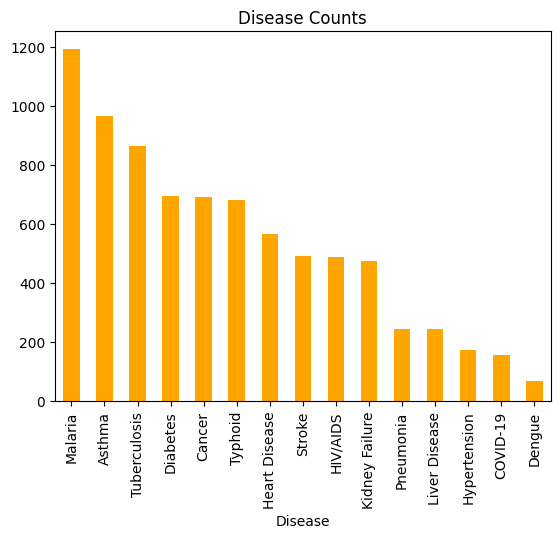

In [48]:
disease_counts = data['Disease'].value_counts()

# Visualize Disease Count
disease_counts.plot(kind='bar', color=['orange'])

# Chart Title
plt.title('Disease Counts')


4.1 If we want to see top 3 or 5 diseases.

In [57]:

# Below line will work as a parameter for nlargest() function.
dynamic_disease_count = 5

top_disease_count = data['Disease'].value_counts().nlargest(dynamic_disease_count)
top_disease_count

# Visualize Top 3 Diseases
# top_disease_count.plot(kind='bar', color=['blue'])

# plt.title('Disease Counts')
# plt.show()

Disease
Malaria         1193
Asthma           966
Tuberculosis     864
Diabetes         694
Cancer           691
Name: count, dtype: int64

4.2 Calculate Percentage of top 3 diseases out of Total diseases.

In [74]:
# 1. Calculating Sum of Total Diseases.
total_disease_count = data['Disease'].value_counts().sum()
# print(total_disease_count)

# 2. Calculating Percentage
   # "top_disease_count" is from above cells. 
percentages_of_Top_Diseases = ((top_disease_count/total_disease_count) * 100).round(2)

# print(f"Percentages of Top Diseases\n {percentages_of_Top_Diseases}%")

# 3. Alloting "%" sign to all values. 
for disease, i in percentages_of_Top_Diseases.items():
    print(f"{disease}: {i} %")


Malaria: 14.91 %
Asthma: 12.08 %
Tuberculosis: 10.8 %
Diabetes: 8.67 %
Cancer: 8.64 %


5. Are certain diseases more prevalent in one gender compared to the other ?

In [76]:
gender_disease = pd.crosstab(data['Disease'], data['Gender'])
print('Disease with Gender Distribution')
print(gender_disease)

Disease with Gender Distribution
Gender          Female  Male
Disease                     
Asthma             320   646
COVID-19            53   104
Cancer             239   452
Dengue              27    42
Diabetes           256   438
HIV/AIDS           155   333
Heart Disease      206   361
Hypertension        65   108
Kidney Failure     182   293
Liver Disease       73   171
Malaria            407   786
Pneumonia           93   153
Stroke             177   316
Tuberculosis       302   562
Typhoid            239   441
